In [1]:
import re

# Sample input lines (replace this with your file reading logic)
f = open('/Users/mohdzaki/Downloads/log_folder_dec8/full_run_apr24_redp_test_24_04_24_21_24.txt','r')
lines  = f.readlines()

# Regular expression to extract iteration and loss
pattern = r"iteration\s+(\d+)/\s+\d+\s+\|.*?lm loss:\s+([\d\.E\+\-]+)"

# List to store the extracted data
loss_llamat2 = []
iter_llamat2 = []

# Process each line
for line in lines:
    match = re.search(pattern, line)
    if match:
        iteration = int(match.group(1))  # Extracted iteration
        loss = float(match.group(2))    # Extracted loss
        loss_llamat2.append(loss)
        iter_llamat2.append(iteration)

In [2]:
from new_plot import *
set_font(size=30, weight='normal')

/opt/anaconda3/envs/gideon/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/envs/gideon/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/envs/gideon/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/envs/gideon/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/envs/gideon/lib/python3.8/_collections_abc.py:832: Ma

In [3]:
import pickle

with open('/Users/mohdzaki/Downloads/log_folder_dec8/loss_llamat3.pkl','rb') as f:
    lossfile = pickle.load(f)
f.close()

In [4]:
loss_llamat3 = lossfile[1]
iter_llamat3 = lossfile[0]

In [5]:
import pandas as pd

In [6]:
dfl3 = pd.DataFrame(loss_llamat3)
dfl3.ewm(com=0.5).mean()

,0
0,1.779300
1,1.486327
2,1.706732
3,1.779442
4,1.759733
...,...
13807,1.687888
13808,1.681116
13809,1.669745
13810,1.649028


In [7]:
colors = ['#64B5F6', '#64B5F6', '#F06292', '#F06292']

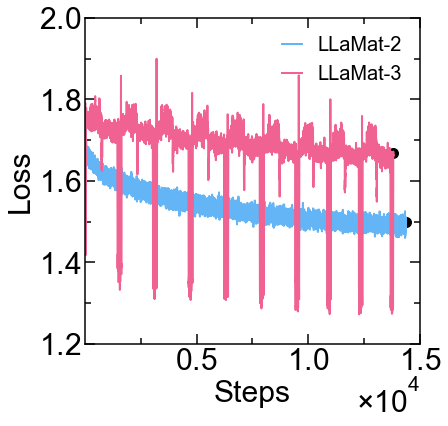

In [16]:
fig,ax = plt.subplots(figsize=[6,6])
plt.plot(iter_llamat2, loss_llamat2, c=colors[0], label='LLaMat-2')
plt.plot(dfl3.ewm(com=2.5).mean(), c=colors[-1], label='LLaMat-3')

# plt.plot(iter_llamat3, loss_llamat3, c=colors[-1])

plt.scatter(iter_llamat3[-1], loss_llamat3[-1],fc='k')
plt.scatter(iter_llamat2[-1], loss_llamat2[-1],fc='k')
plt.ylim(1.2,2.)
plt.xlim(1,15000)
plt.legend(loc='upper right', handlelength=1, fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.savefig('loss_llamat.png')
plt.show()

In [17]:
pwd

'/Users/mohdzaki/Documents/GitHub/MatLLaMA'

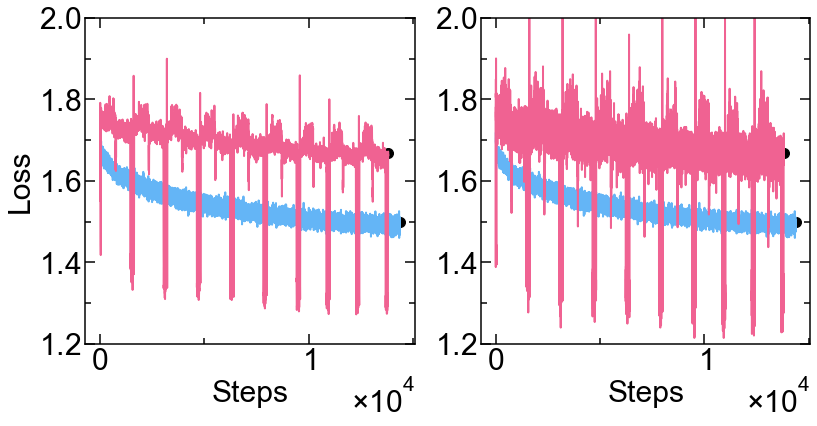

In [41]:
fig,ax = plt.subplots(figsize=[13,6], nrows=1,ncols=2)


ax[0].plot(iter_llamat2, loss_llamat2, c=colors[0])
ax[1].plot(iter_llamat2, loss_llamat2, c=colors[0])
ax[0].scatter(iter_llamat2[-1], loss_llamat2[-1],fc='k')
ax[1].scatter(iter_llamat2[-1], loss_llamat2[-1],fc='k')

ax[0].plot(dfl3.ewm(com=2.5).mean(), c=colors[-1])
ax[1].plot(iter_llamat3, loss_llamat3, c=colors[-1])

ax[0].scatter(iter_llamat3[-1], loss_llamat3[-1],fc='k')
ax[1].scatter(iter_llamat3[-1], loss_llamat3[-1],fc='k')

ax[0].set_ylim(1.2,2.)
ax[1].set_ylim(1.2,2.)

# plt.xlim(1,15000)
ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Loss')
ax[1].set_xlabel('Steps')
# plt.ylabel('Loss')
plt.show()

In [42]:
import json

In [48]:
llamat_2_cif = json.load(open('/Users/mohdzaki/Downloads/log_folder_dec8/loss_llamat-2-cif.json','r'))['llamat-2-cif']
llamat_3_cif = json.load(open('/Users/mohdzaki/Downloads/log_folder_dec8/loss_llamat-3-cif.json','r'))['llamat-3-cif']

In [100]:
pwd

'/Users/mohdzaki/Documents/GitHub/MatLLaMA'

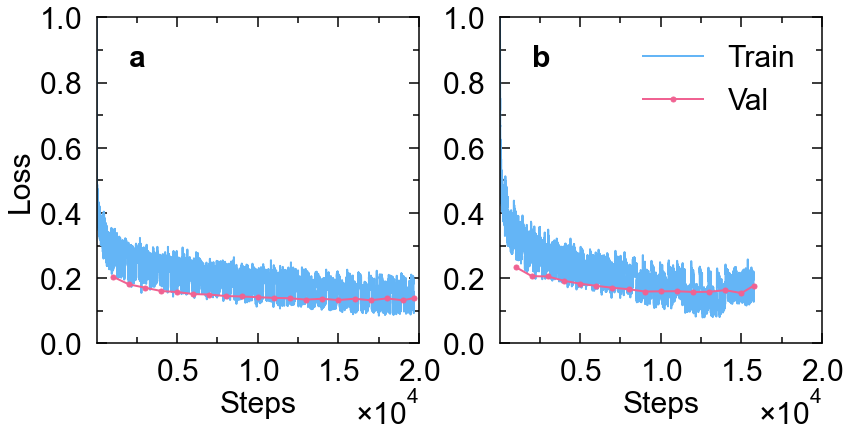

In [82]:
fig,ax = plt.subplots(figsize=[13,6], nrows=1,ncols=2)


ax[0].plot(llamat_2_cif['train']['steps'], llamat_2_cif['train']['loss'], c=colors[0], label = 'Train')
ax[0].plot(llamat_2_cif['val']['steps'], llamat_2_cif['val']['loss'],'-o', c=colors[-1], ms=5, label='Val')

ax[1].plot(llamat_3_cif['train']['steps'], llamat_3_cif['train']['loss'], c=colors[0], label = 'Train')
ax[1].plot(llamat_3_cif['val']['steps'], llamat_3_cif['val']['loss'], '-o',c=colors[-1], ms=5, label='Val')

ax[0].set_ylim(0,1.)
ax[1].set_ylim(0,1.)

ax[0].set_xticks([0*1e4,0.5*1e4,1*1e4,1.5*1e4,2*1e4])
ax[1].set_xticks([0*1e4,0.5*1e4,1*1e4,1.5*1e4,2*1e4])

ax[0].set_xlim(1,20000)
ax[1].set_xlim(1,20000)
ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax[0].tick_params(axis='both', which='major', pad=15)  # move the tick labels
ax[1].tick_params(axis='both', which='major', pad=15)  # move the tick labels

ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Loss')
ax[1].set_xlabel('Steps')

plt.subplots_adjust(wspace=0.25)
ax[0].text(0.1,0.85, 'a', transform=ax[0].transAxes, fontweight='bold')
ax[1].text(0.1,0.85, 'b', transform=ax[1].transAxes, fontweight='bold')
plt.legend()
plt.savefig('fig-app-cif-loss.png', dpi=1200, bbox_inches='tight')

# plt.ylabel('Loss')
plt.show()

In [84]:
labels = ['LLaMat-3-chat',  'LLaMat-3',  'LLaMa-3-chat', 'LLaMa-3','LLaMaT-2-chat', 'LLaMaT-2', 'LLaMa-2-chat', 'LLaMa-2']

In [93]:
colors

['#64B5F6', '#64B5F6', '#F06292', '#F06292']

In [85]:
start = 0; end = 4;

In [95]:
ls  = ['-','--','-','--']

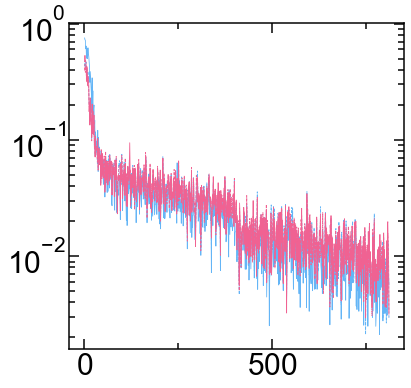

In [96]:
fig, ax = plt.subplots(figsize=[6.,6])
for idx, l in enumerate(labels[start:end]):
    data = json.load(open(f'./plots/logs/{l}.json','r'))
    plt.plot(data['steps'], data['loss'], label=label, alpha = 1, linewidth=0.8, c=colors[idx], ls = ls[idx])
ax.set_yscale('log')

In [97]:
start = 4; end = 8;

In [98]:
ls  = ['-','--','-','--']

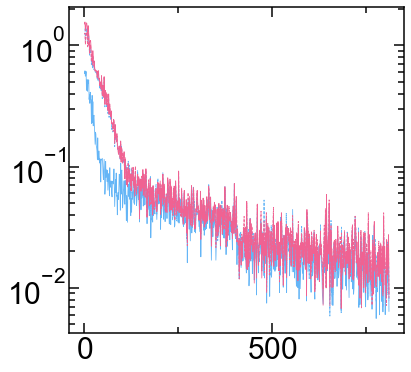

In [99]:
fig, ax = plt.subplots(figsize=[6.,6])
for idx, l in enumerate(labels[start:end]):
    data = json.load(open(f'./plots/logs/{l}.json','r'))
    plt.plot(data['steps'], data['loss'], label=label, alpha = 1, linewidth=0.8, c=colors[idx], ls = ls[idx])
ax.set_yscale('log')